In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
import os

In [4]:
bs = 64

In [5]:
path_img=''
fnames = get_image_files(path_img+'train_proc')
fnames[:5]

[WindowsPath('train_proc/ablaidX.png'),
 WindowsPath('train_proc/ablcesX.png'),
 WindowsPath('train_proc/ablcher.png'),
 WindowsPath('train_proc/ablches.png'),
 WindowsPath('train_proc/abldedX.png')]

In [6]:
len(fnames) #should be 4237-6= 4231

4231

In [7]:
alist=os.listdir('train_proc')
for i in range(len(alist)):
    alist[i]=[alist[i]]
    for j in range(7):
        alist[i].append(alist[i][0][j])
df=pd.DataFrame(alist)

In [8]:
alist[:5]

[['ablaidX.png', 'a', 'b', 'l', 'a', 'i', 'd', 'X'],
 ['ablcesX.png', 'a', 'b', 'l', 'c', 'e', 's', 'X'],
 ['ablcher.png', 'a', 'b', 'l', 'c', 'h', 'e', 'r'],
 ['ablches.png', 'a', 'b', 'l', 'c', 'h', 'e', 's'],
 ['abldedX.png', 'a', 'b', 'l', 'd', 'e', 'd', 'X']]

In [9]:
df.head()

,0,1,2,3,4,5,6,7
0,ablaidX.png,a,b,l,a,i,d,X
1,ablcesX.png,a,b,l,c,e,s,X
2,ablcher.png,a,b,l,c,h,e,r
3,ablches.png,a,b,l,c,h,e,s
4,abldedX.png,a,b,l,d,e,d,X


In [10]:
data = ImageDataBunch.from_df('',df, folder='train_proc', size=(77,247), bs=bs,seed=43,label_col=1)

In [40]:
#data = ImageDataBunch.from_name_func(path_img+'train', fnames, label_func= lambda x: str(x)[6], size=(77,247), bs=bs,seed=43)

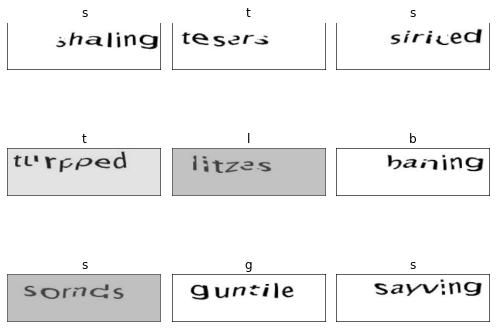

In [11]:
data.show_batch(rows=3, figsize=(7,6))

In [12]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1,pretrained=False)

In [13]:
learn.path

WindowsPath('.')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


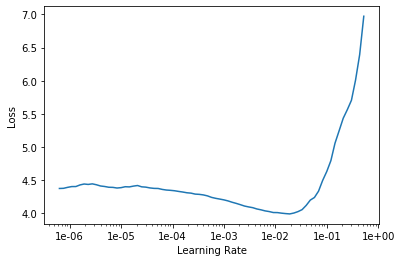

In [22]:
learn.lr_find()
learn.recorder.plot()

In [43]:
lr=1e-2
learn.fit_one_cycle(20,max_lr=lr,wd=0.01)

epoch,train_loss,valid_loss,accuracy,time
0,3.645252,3.388446,0.065012,00:39
1,3.325515,3.035397,0.180851,00:37
2,2.734297,5.056436,0.210402,00:37
3,1.971851,5.891288,0.161939,00:37
4,1.276437,10.931995,0.250591,00:37
5,1.145040,22.771957,0.147754,00:37
6,0.750971,7.283843,0.394799,00:37
7,0.579166,10.407692,0.076832,00:37
8,0.446399,7.223634,0.059102,00:38
9,0.316483,0.357129,0.887707,00:37


In [14]:
learn.save('stage-indi-1')

In [ ]:
learn.load('stage-indi-1');

In [15]:
learn.path

PosixPath('.')

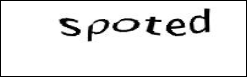

In [16]:
img=open_image('test/spoted.png');
img

In [67]:
pred_class,pred_idx,outputs = learn.predict(img)

In [68]:
str(pred_class)

's'

In [54]:
pred_idx

tensor(23)

In [55]:
outputs

tensor([3.6046e-13, 2.4902e-08, 1.8010e-12, 2.0407e-12, 2.4958e-08, 9.8052e-09,
        4.0581e-12, 2.7904e-09, 2.4369e-12, 3.3552e-08, 3.2290e-10, 6.0243e-11,
        3.2393e-12, 5.0226e-14, 1.3144e-13, 9.6250e-07, 4.5886e-14, 1.2869e-12,
        1.7114e-13, 5.3050e-12, 1.0496e-12, 7.0075e-14, 1.1670e-10, 1.0000e+00,
        5.8437e-08, 3.5649e-13, 2.0630e-08, 6.8752e-13, 1.8727e-09, 2.2536e-10,
        1.0818e-09])

In [44]:
#train/boatl  er
for i in range(7):
    print('number'+str(i))
    data = ImageDataBunch.from_df('',df, folder='train_proc', size=(77,247), bs=bs,seed=43,label_col=i+1)
    learn = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1,pretrained=False)
    lr=1e-2
    learn.fit_one_cycle(30,max_lr=lr,wd=0.01)
    
    learn.save('stage-indi-pos-'+str(i+1))

number0


epoch,train_loss,valid_loss,accuracy,time
0,3.651757,3.465081,0.031915,00:37
1,3.388052,3.260057,0.139480,00:37
2,2.964241,5.016365,0.177305,00:38
3,2.192709,16.496096,0.107565,00:38
4,1.365694,8.826085,0.156028,00:37
5,1.041809,8.754241,0.108747,00:38
6,0.769504,10.558398,0.274232,00:37
7,0.627591,3.922040,0.367612,00:38
8,0.563648,19.145317,0.034279,00:37
9,0.405338,24.766489,0.003546,00:38


number1


/data/anaconda/envs/fastai/lib/python3.6/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
g
  if getattr(ds, 'warn', False): warn(ds.warn)


epoch,train_loss,valid_loss,accuracy,time
0,3.302501,3.117234,0.131361,00:39
1,2.928398,3.566590,0.201183,00:37
2,2.570139,3.654066,0.205917,00:37
3,2.129050,6.985747,0.188166,00:37
4,1.770400,4.401849,0.228402,00:37
5,1.353388,2.468966,0.474556,00:37
6,1.051610,3.268554,0.222485,00:37
7,0.862653,4.795820,0.293491,00:37
8,0.630353,4.920629,0.349112,00:37
9,0.687193,7.245865,0.106509,00:37


number2


epoch,train_loss,valid_loss,accuracy,time
0,3.461245,3.273472,0.093381,00:38
1,3.242820,3.746109,0.070922,00:38
2,3.076980,3.123362,0.139480,00:37
3,3.015817,3.134331,0.172577,00:38
4,2.947014,4.834052,0.114657,00:37
5,2.888697,48.810539,0.024823,00:37
6,2.701404,5.030775,0.089835,00:37
7,2.344459,3.827873,0.165485,00:37
8,1.987943,3.854368,0.301418,00:37
9,1.650323,7.795287,0.132388,00:37


number3


epoch,train_loss,valid_loss,accuracy,time
0,3.374549,3.230115,0.056738,00:38
1,3.197598,3.621341,0.057920,00:38
2,3.081342,4.733429,0.105201,00:38
3,3.070897,8.058716,0.065012,00:38
4,3.064600,14.724394,0.078014,00:38
5,3.019832,7.826558,0.059102,00:37
6,3.040849,3.113438,0.121749,00:38
7,2.779739,3.308417,0.156028,00:37
8,2.356349,4.497625,0.180851,00:38
9,1.966195,2.429816,0.326241,00:38


number4


epoch,train_loss,valid_loss,accuracy,time
0,3.204690,3.078338,0.101655,00:37
1,2.678239,2.649235,0.359338,00:38
2,2.349011,2.369104,0.346336,00:38
3,2.167605,2.428453,0.388889,00:38
4,2.020929,3.618693,0.255319,00:38
5,1.953312,2.061384,0.401891,00:37
6,1.813562,2.864464,0.420804,00:38
7,1.677640,4.444986,0.163121,00:38
8,1.504480,2.203088,0.469267,00:38
9,1.354004,9.453425,0.234043,00:38


number5


epoch,train_loss,valid_loss,accuracy,time
0,3.212275,2.970431,0.173759,00:38
1,2.729871,2.568692,0.297872,00:38
2,2.160564,2.249090,0.408983,00:38
3,1.747091,5.621553,0.289598,00:38
4,1.494593,1.565239,0.574468,00:38
5,1.351415,1.615298,0.473995,00:37
6,1.163579,2.750919,0.447991,00:38
7,1.028227,1.919402,0.444444,00:37
8,0.879697,2.541109,0.410165,00:38
9,0.656505,0.813326,0.801418,00:38


number6


/data/anaconda/envs/fastai/lib/python3.6/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
q
  if getattr(ds, 'warn', False): warn(ds.warn)


epoch,train_loss,valid_loss,accuracy,time
0,2.646103,2.411907,0.506509,00:38
1,2.092735,1.909154,0.546746,00:38
2,1.595773,2.204903,0.568047,00:38
3,1.238587,1.298413,0.635503,00:38
4,1.049833,1.691501,0.616568,00:38
5,0.951011,3.571333,0.444970,00:37
6,0.738985,3.178883,0.506509,00:38
7,0.634321,3.555486,0.383432,00:38
8,0.465006,1.043013,0.785799,00:38
9,0.388575,4.457145,0.557396,00:38


In [15]:
test_list=os.listdir('test')

In [ ]:
data = ImageDataBunch.from_df('',df, folder='train_proc', size=(77,247), bs=bs,seed=43,label_col=1)
learn1 = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1,pretrained=False);learn1.load('stage-indi-pos-1');
data = ImageDataBunch.from_df('',df, folder='train_proc', size=(77,247), bs=bs,seed=43,label_col=2)
learn2 = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1,pretrained=False);learn2.load('stage-indi-pos-2');
data = ImageDataBunch.from_df('',df, folder='train_proc', size=(77,247), bs=bs,seed=43,label_col=3)
learn3 = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1,pretrained=False);learn3.load('stage-indi-pos-3');
data = ImageDataBunch.from_df('',df, folder='train_proc', size=(77,247), bs=bs,seed=43,label_col=4)
learn4 = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1,pretrained=False);learn4.load('stage-indi-pos-4');
data = ImageDataBunch.from_df('',df, folder='train_proc', size=(77,247), bs=bs,seed=43,label_col=5)
learn5 = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1,pretrained=False);learn5.load('stage-indi-pos-5');
data = ImageDataBunch.from_df('',df, folder='train_proc', size=(77,247), bs=bs,seed=43,label_col=6)
learn6 = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1,pretrained=False);learn6.load('stage-indi-pos-6');
data = ImageDataBunch.from_df('',df, folder='train_proc', size=(77,247), bs=bs,seed=43,label_col=7)
learn7 = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1,pretrained=False);learn7.load('stage-indi-pos-7');
learn_list=[learn1,learn2,learn3,learn4,learn5,learn6,learn7]

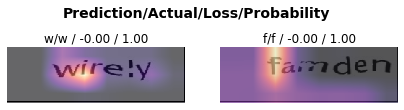

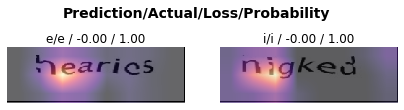

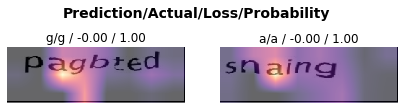

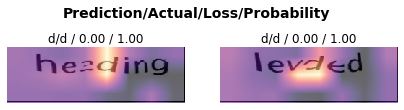

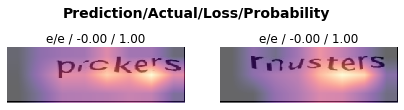

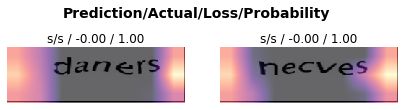

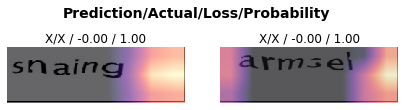

In [53]:
figures = []
for learner in learn_list:
    figures.append(learner.interpret().plot_top_losses(2, heatmap=True,heatmap_thresh=14,figsize=(7,2), largest=False, return_fig=True))

In [ ]:
img=open_image('test/spoted.png')
for i in learn_list:
    pred_class,pred_idx,outputs = i.predict(img)
    print(str(pred_class))